***Universidad Nacional de Colombia-Sede Bogotá***

***Física Experimental de Partículas***

***Andrés Francisco Romero Bohada***

***Daniel Santiago Rodríguez Ruiz***

<b>1. Plot the number of average interactions per bunch-crossing (mu_average)</b>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
f = ROOT.TFile.Open("Tracks_Clusters.root")

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

In [4]:
tree = f.Get("JetRecoTree")

In [5]:
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

In [6]:
hist_mu_average = ROOT.TH1F("mu_average","Average interactions per bunch-crossing; mu_average ; Events ",42,1,84)

In [7]:
for event in tree:
    hist_mu_average.Fill(tree.mu_average)

print("Done!")

Done!


In [8]:
hist_mu_average.SetFillColor(2)
hist_mu_average.Draw()

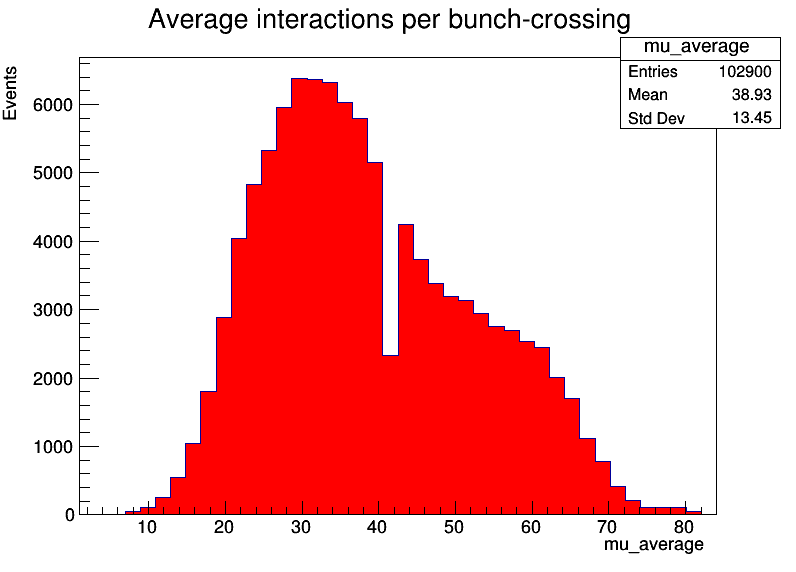

In [9]:
canvas.Draw()

In [10]:
scale = hist_mu_average.Integral()
hist_mu_average.Scale(1/scale)
hist_mu_average.SetFillColor(2)

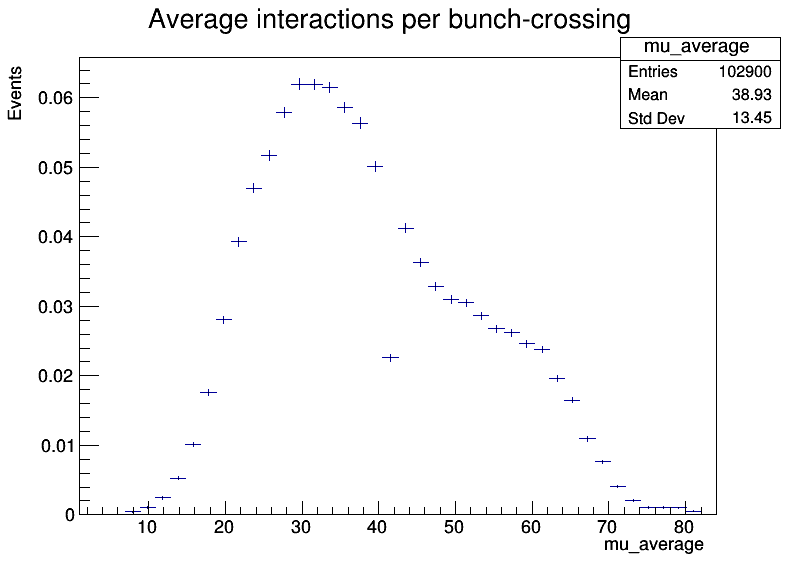

In [11]:
hist_mu_average.Draw()
canvas.Draw("hist_mu_average")

2. Make a 2D histogram of NPV vs. mu

In [12]:
hist_NPV = ROOT.TH1F("NPV","NPV vs mu; NPV ; Events ",42,1,84)

In [13]:
for event in tree:
    hist_NPV.Fill(tree.NPV)

print("Done!")

Done!


In [14]:
hist_NPV.SetFillColor(2)
hist_NPV.Draw()

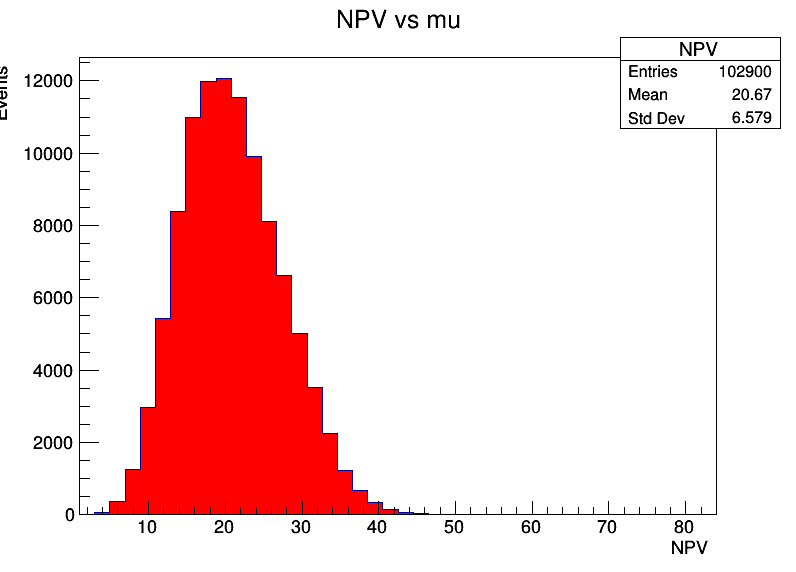

In [15]:
canvas.Draw()

In [16]:
scale = hist_NPV.Integral()
hist_NPV.Scale(1/scale)
hist_NPV.SetFillColor(2)

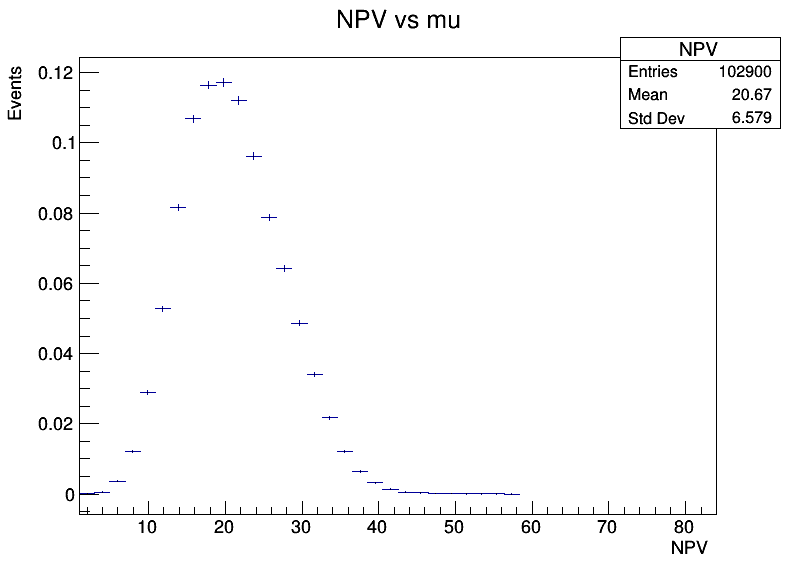

In [17]:
hist_NPV.Draw()
canvas.Draw("hist_NPV")

<b>2. Make a 2D histogram of NPV vs. mu</b>

In [18]:
hist_npv_mu = ROOT.TH2F("npv_mu","NPV vs mu_average; NPV; mu_average ; Events ",25,1,50,42,1,84)

In [19]:
for event in tree:
    hist_npv_mu.Fill(tree.NPV, tree.mu_average )

print("Done!")

Done!


In [20]:
hist_npv_mu.Draw("COLZ")

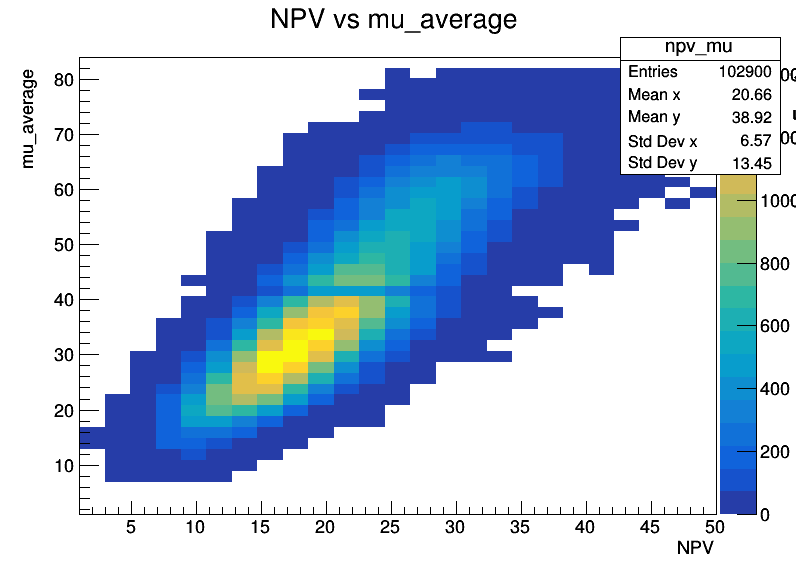

In [21]:
canvas.Draw()

<b>3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters: NPV vs. nTrack, NPV vs. nClusters, mu vs. nTrack, mu vs. NClusters </b>

In [22]:
hist_npv_nTrack = ROOT.TH2F("npv_nTrack","npv vs nTrack; NPV; NTracks ; Events ",25,1,50,50,0,3000)

In [23]:
hist_npv_nCluster = ROOT.TH2F("npv_nCluster","npv vs nCluster; NPV; NClusters ; Events ",25,1,50,50,0,1800)

In [24]:
hist_mu_nTrack = ROOT.TH2F("mu_nTrack","mu vs nTrack; mu_average; NTracks ; Events ",42,0,84,50,0,3000)

In [25]:
hist_mu_nCluster = ROOT.TH2F("mu_nCluster","npv vs nCluster; mu_average; NClusters ; Events ",42,0,84,50,0,1800)

In [26]:
for event in tree:
    hist_npv_nTrack.Fill(tree.NPV, tree.Tracks_pt.size() )
    hist_npv_nCluster.Fill(tree.NPV, tree.Clusters_pt.size() )
    hist_mu_nTrack.Fill(tree.mu_average, tree.Tracks_pt.size() )
    hist_mu_nCluster.Fill(tree.mu_average, tree.Clusters_pt.size())

print("Done!")

Done!


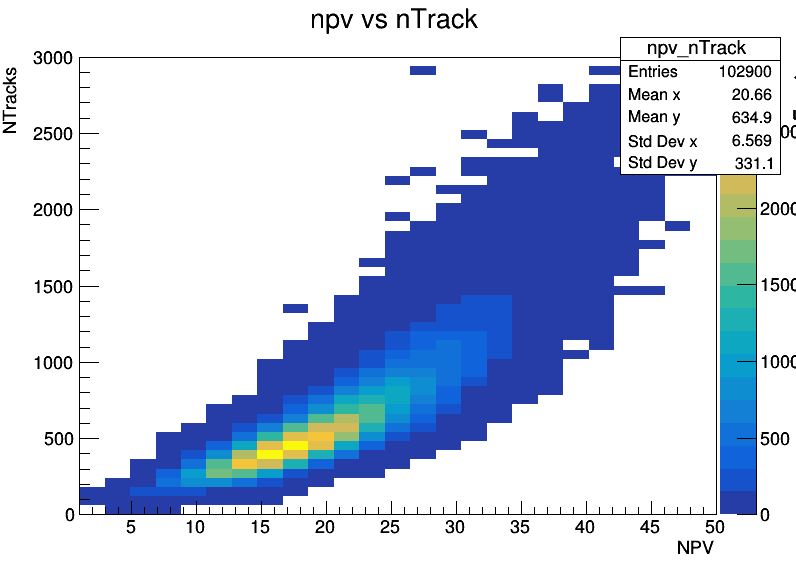

In [27]:
hist_npv_nTrack.Draw("COLZ")
canvas.Draw()

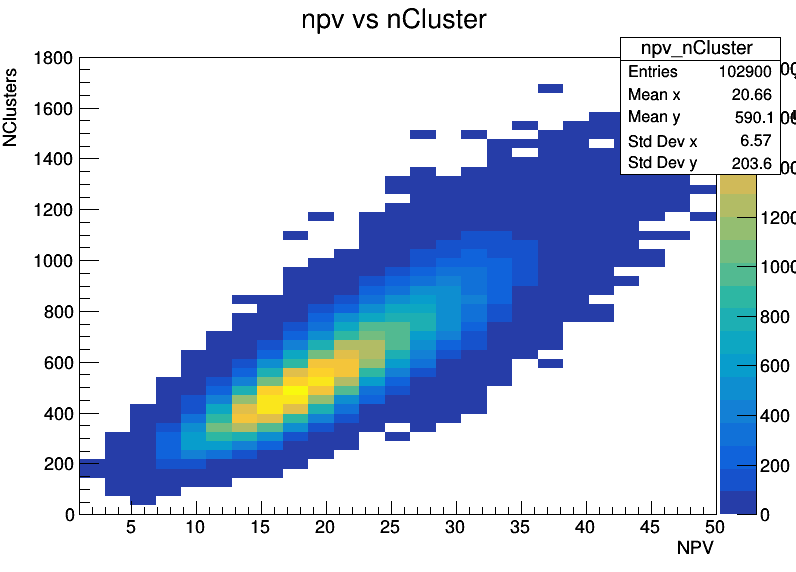

In [28]:
hist_npv_nCluster.Draw("COLZ")
canvas.Draw()

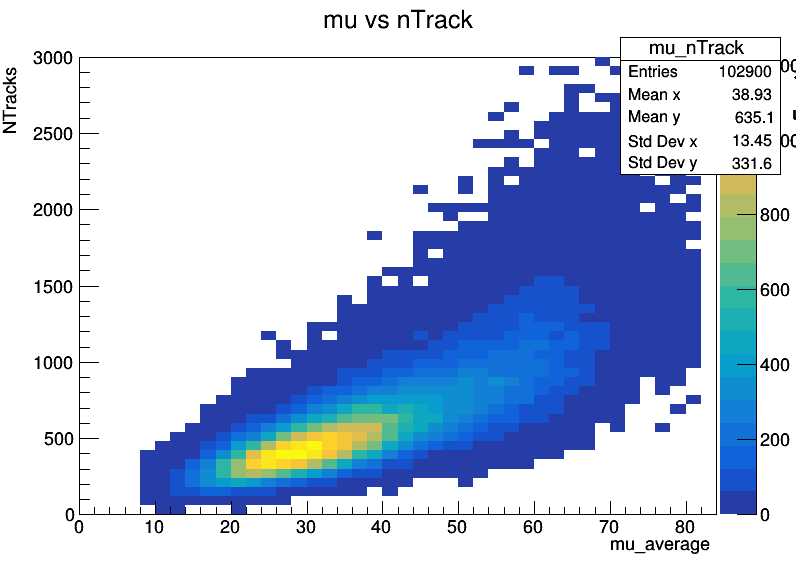

In [29]:
hist_mu_nTrack.Draw("COLZ")
canvas.Draw()

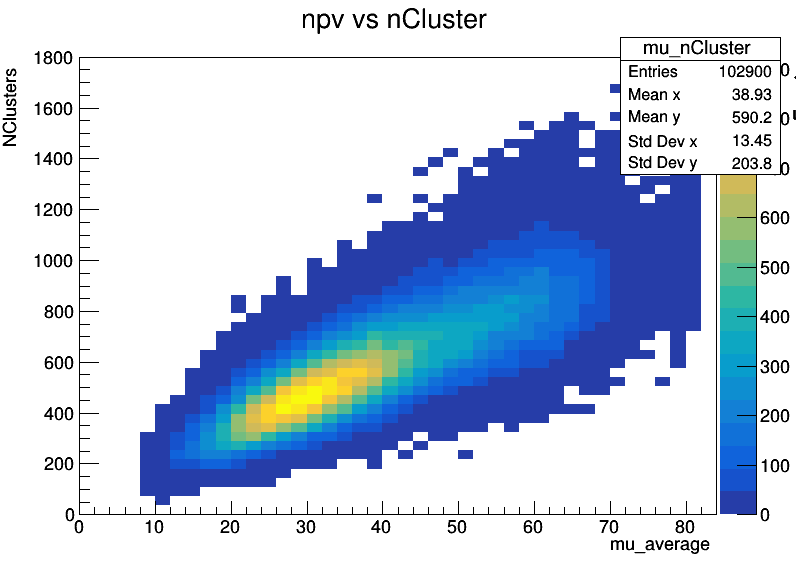

In [30]:
hist_mu_nCluster.Draw("COLZ")
canvas.Draw()

<b>4. Plot all track, cluster and particle variables and interpret the meaning of each variable</b>

Done!


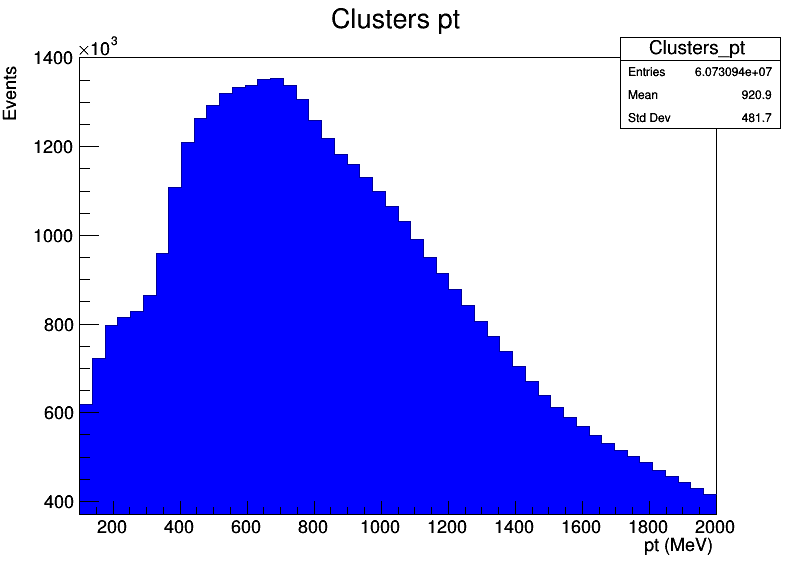

In [31]:
#Histograma para los Clústers

hist_Clusters_pt= ROOT.TH1F("Clusters_pt","Clusters pt; pt (MeV); Events ",50,0,2000)

for event in tree:
    for tr in range(tree.Clusters_pt.size()):
        hist_Clusters_pt.Fill(tree.Clusters_pt.at(tr))

print("Done!")

hist_Clusters_pt.SetFillColor(4)
hist_Clusters_pt.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Clusters_eta (Potential memory leak).


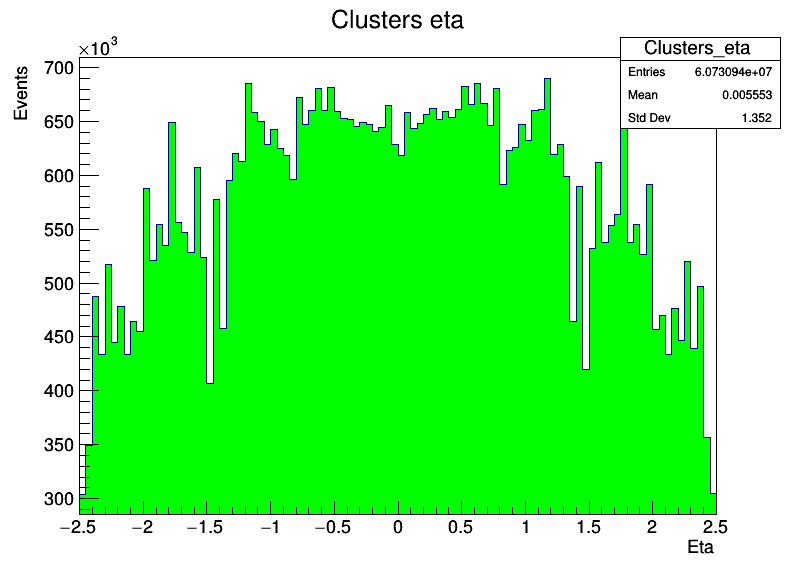

In [74]:
hist_Clusters_eta= ROOT.TH1F("Clusters_eta","Clusters eta; Eta; Events ",100,-2.5,2.5)

for event in tree:
    for tr in range(tree.Clusters_eta.size()):
        hist_Clusters_eta.Fill(tree.Clusters_eta.at(tr))

print("Done!")

hist_Clusters_eta.SetFillColor(3)
hist_Clusters_eta.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Clusters_phi (Potential memory leak).


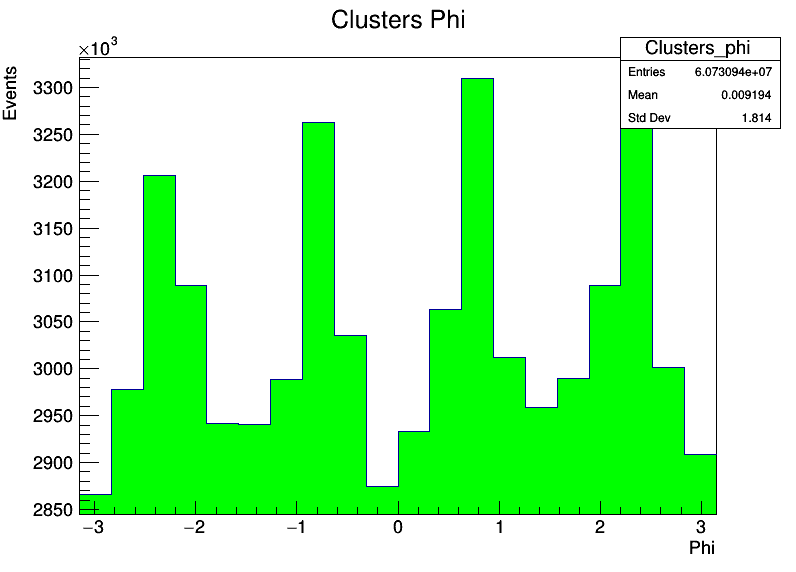

In [71]:
hist_Clusters_phi= ROOT.TH1F("Clusters_phi","Clusters Phi; Phi; Events ",20,-3.15,3.15)

for event in tree:
    for tr in range(tree.Clusters_phi.size()):
        hist_Clusters_phi.Fill(tree.Clusters_phi.at(tr))

print("Done!")

hist_Clusters_phi.SetFillColor(3)
hist_Clusters_phi.Draw()
canvas.Draw()


Done!


Warning in <TFile::Append>: Replacing existing TH1: Clusters_m (Potential memory leak).


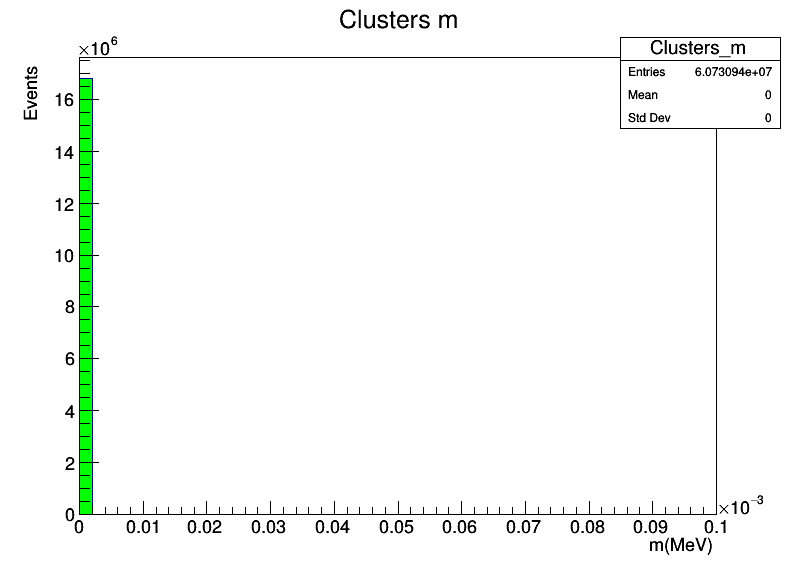

In [76]:
hist_Clusters_m= ROOT.TH1F("Clusters_m","Clusters m; m(MeV); Events ",50,0,0.0001)

for event in tree:
    for tr in range(tree.Clusters_m.size()):
        hist_Clusters_m.Fill(tree.Clusters_m.at(tr))

print("Done!")

hist_Clusters_m.SetFillColor(3)
hist_Clusters_m.Draw()
canvas.Draw()

Done!


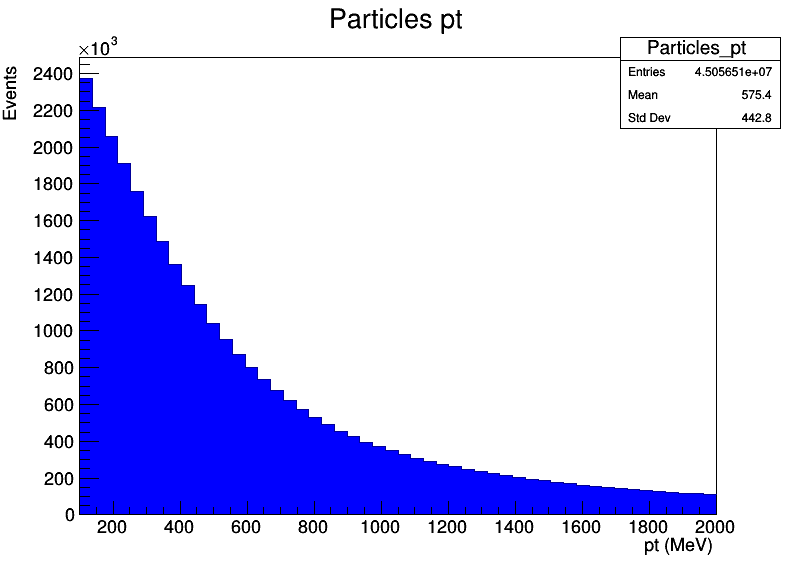

In [35]:
#Histograma para los Partículas

hist_Particles_pt= ROOT.TH1F("Particles_pt","Particles pt; pt (MeV); Events ",50,0,2000)

for event in tree:
    for tr in range(tree.Particles_pt.size()):
        hist_Particles_pt.Fill(tree.Particles_pt.at(tr))

print("Done!")

hist_Particles_pt.SetFillColor(4)
hist_Particles_pt.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Particles_eta (Potential memory leak).


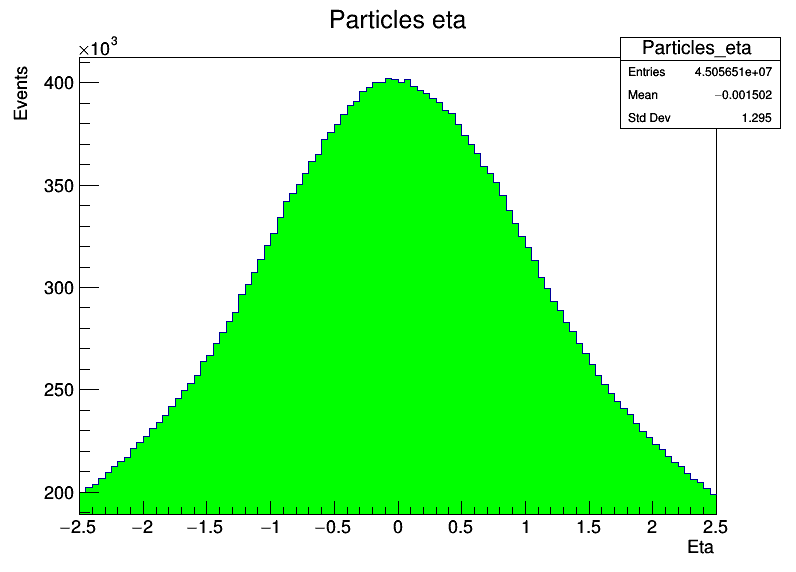

In [72]:

hist_Particles_eta= ROOT.TH1F("Particles_eta","Particles eta; Eta; Events ",100,-2.5,2.5)

for event in tree:
    for tr in range(tree.Particles_eta.size()):
        hist_Particles_eta.Fill(tree.Particles_eta.at(tr))

print("Done!")

hist_Particles_eta.SetFillColor(3)
hist_Particles_eta.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Particles_phi (Potential memory leak).


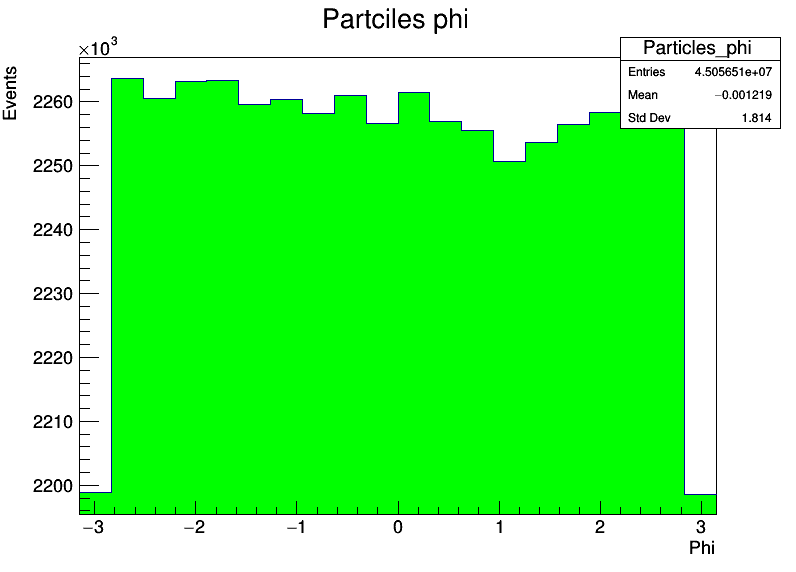

In [68]:
hist_Particles_phi= ROOT.TH1F("Particles_phi","Partciles phi; Phi; Events ",20,-3.15,3.15)

for event in tree:
    for tr in range(tree.Particles_phi.size()):
        hist_Particles_phi.Fill(tree.Particles_phi.at(tr))

print("Done!")

hist_Particles_phi.SetFillColor(3)
hist_Particles_phi.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Particles_m (Potential memory leak).


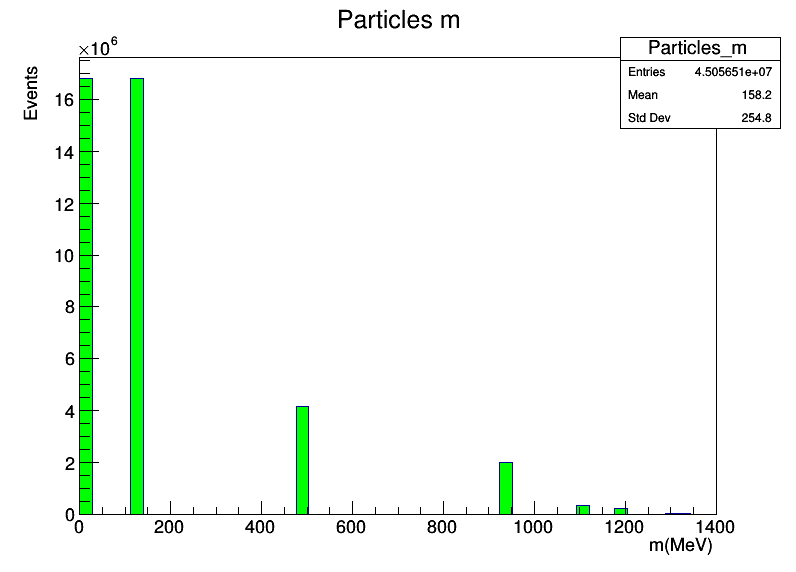

In [69]:
hist_Particles_m= ROOT.TH1F("Particles_m","Particles m; m(MeV); Events ",50,0,1400)

for event in tree:
    for tr in range(tree.Particles_m.size()):
        hist_Particles_m.Fill(tree.Particles_m.at(tr))

print("Done!")

hist_Particles_m.SetFillColor(3)
hist_Particles_m.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Particles_pdgID (Potential memory leak).


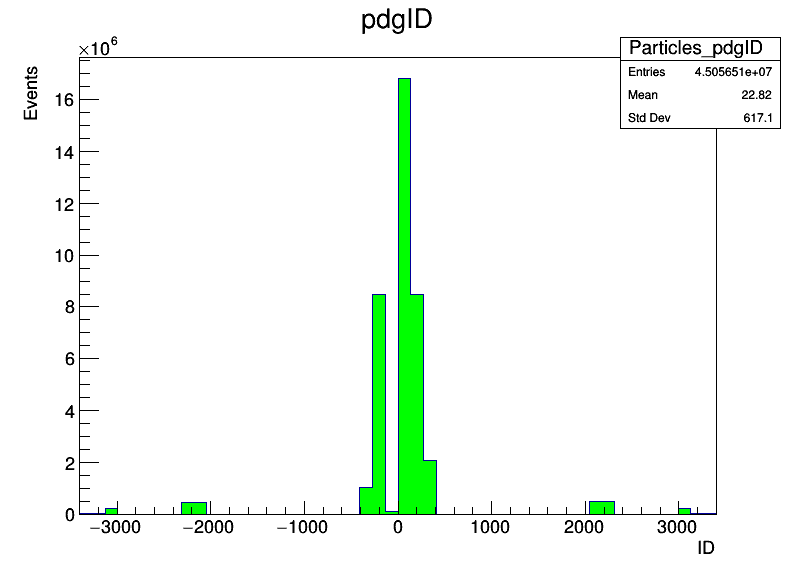

In [67]:
hist_Particles_pdgID= ROOT.TH1F("Particles_pdgID","pdgID; ID; Events ",50,-3400,3400)

for event in tree:
    for tr in range(tree.Particles_pdgID.size()):
        hist_Particles_pdgID.Fill(tree.Particles_pdgID.at(tr))

print("Done!")

hist_Particles_pdgID.SetFillColor(3)
hist_Particles_pdgID.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Tracks_pt (Potential memory leak).


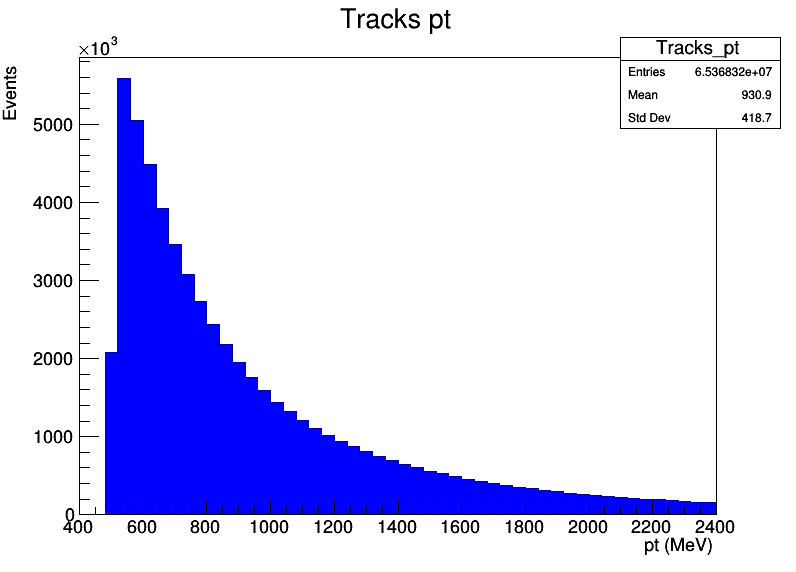

In [61]:
#Histograma para los Tracks

hist_Tracks_pt= ROOT.TH1F("Tracks_pt","Tracks pt; pt (MeV); Events ",50,400,2400)

for event in tree:
    for tr in range(tree.Tracks_pt.size()):
        hist_Tracks_pt.Fill(tree.Tracks_pt.at(tr))

print("Done!")

hist_Tracks_pt.SetFillColor(4)
hist_Tracks_pt.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Tracks_eta (Potential memory leak).


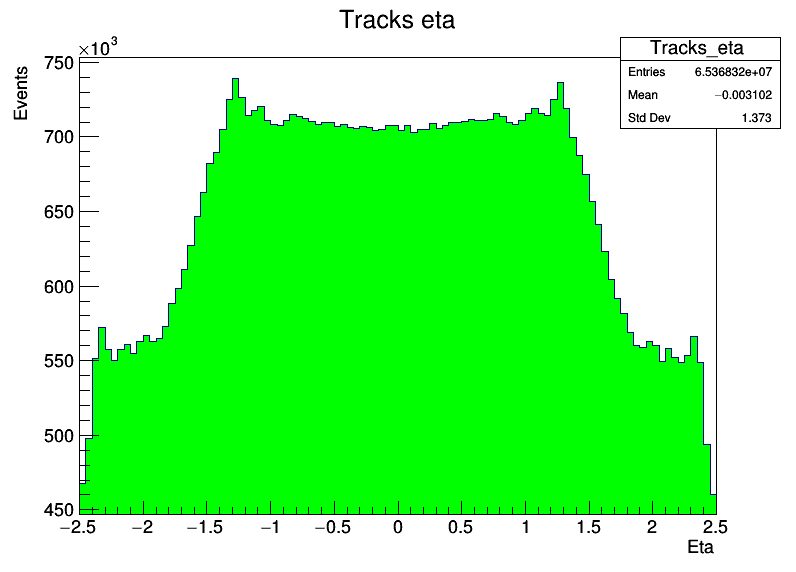

In [73]:
hist_Tracks_eta= ROOT.TH1F("Tracks_eta","Tracks eta; Eta; Events ",100,-2.5,2.5)

for event in tree:
    for tr in range(tree.Tracks_eta.size()):
        hist_Tracks_eta.Fill(tree.Tracks_eta.at(tr))

print("Done!")

hist_Tracks_eta.SetFillColor(3)
hist_Tracks_eta.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Tracks_phi (Potential memory leak).


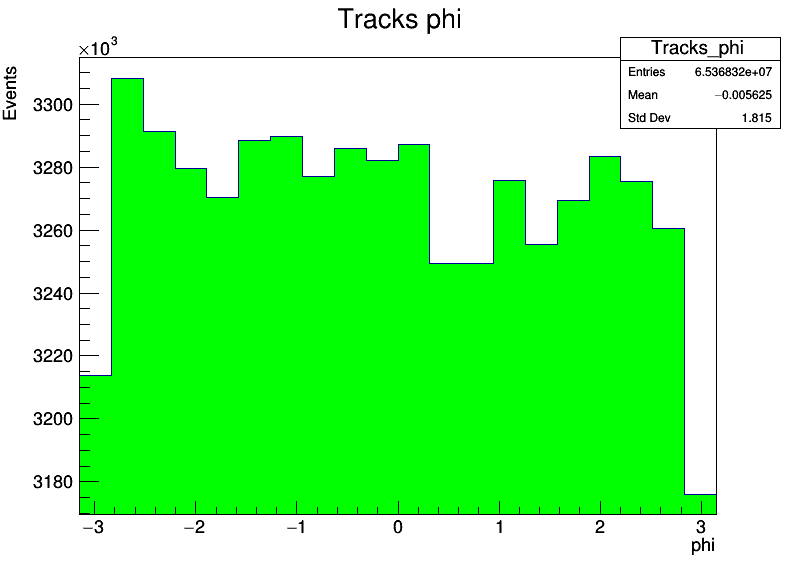

In [66]:
hist_Tracks_phi= ROOT.TH1F("Tracks_phi"," Tracks phi; phi; Events ",20,-3.15,3.15)

for event in tree:
    for tr in range(tree.Tracks_phi.size()):
        hist_Tracks_phi.Fill(tree.Tracks_phi.at(tr))

print("Done!")

hist_Tracks_phi.SetFillColor(3)
hist_Tracks_phi.Draw()
canvas.Draw()

Done!


Warning in <TFile::Append>: Replacing existing TH1: Tracks_m (Potential memory leak).


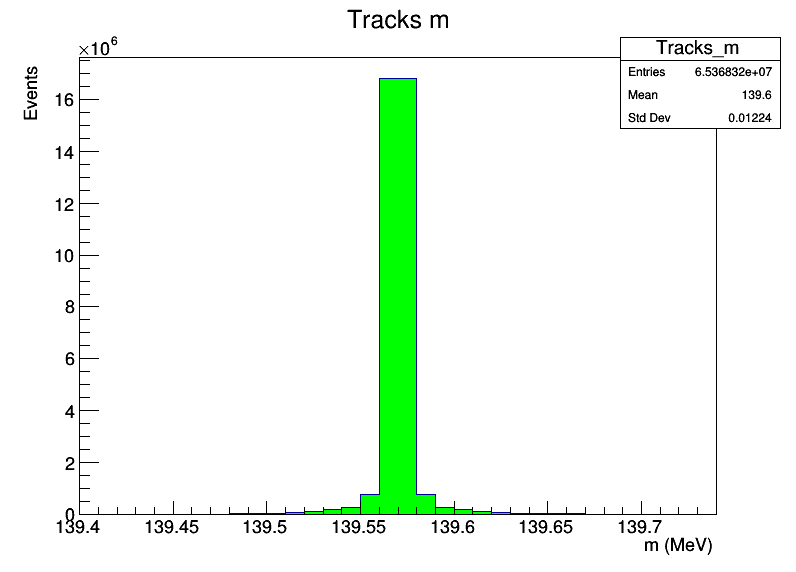

In [77]:
hist_Tracks_m= ROOT.TH1F("Tracks_m","Tracks m; m (MeV); Events ",34,139.4,139.74)

for event in tree:
    for tr in range(tree.Tracks_m.size()):
        hist_Tracks_m.Fill(tree.Tracks_m.at(tr))

print("Done!")

hist_Tracks_m.SetFillColor(3)
hist_Tracks_m.Draw()
canvas.Draw()

Con lo que las variables referentes a Clusters, Tracks y Particulas estarían cubiertas

***Significado de las variables:***

Pt: el momento (MeV, en unidades naturales) de los Tracks, Particulas y Clústers

$\phi$: es el ángulo azimutal que permite saber la posición de los tracks, partículas y clústers, es decir, el ángulo formado en el plano xy para ubicarlo en el detector.

$\eta$: es la psuedo-rapidez para representar el ángulo polar ($\theta$), es decir, la ubicación de los tracks, partículas y clústers en el plano yz. Va desde 0 hasta $\infty$, en el ATLAS hasta 2.5 por la geometría del detector. El ángulo $\theta$ representa el ángulo polar o de localización del track, partícula o clúster en el plano yz. Va desde 90$^o$ hasta 0$^o$.

$m$: representa la masa del track, partícula o clúster en MeV (unidades naturales), que son detectadas en el detector.






<b>6. What is "Particle PDG ID"?</b>

El Particle PDG ID hace referencia la identificación del grupo de datos de las partículas, es decir, es lo que permite identificar cada partícula subatómica como los electrones o protones dentro de la detección en un detector. Se realiza la identificación con un número único de las partículas.

Por ejemplo, el positrón tiene una identificación de PDG -11, el electrón una identificación de PDG 11, y el protón tiene una identificación PDG de 2212.